In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import environs
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import re
import json
import networkx as nx
%matplotlib inline

In [2]:
env = environs.Env()
env.read_env()

root_token = env.str("ROOT_TOKEN", "")

In [3]:
uri = f"https://signals.minsky.cc/tweets/2020-06-05T(00-01):00:00.csv?timezone=-5&token={root_token}"
tweets = pd.read_csv(uri)
print(len(tweets))

1055


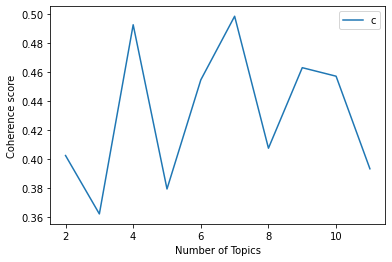

In [43]:
documents_list = [str(t) for t in tweets["tweet"]]
black_list = ["http", "https", "com", "twitter", "fund", "relief", "pic", "www", "pe"]
tokenizer = RegexpTokenizer(r'\w+')
es_stop = set(stopwords.words('spanish'))
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
texts = []
for i in documents_list:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in es_stop]
    stopped_tokens = [i for i in stopped_tokens if not i in en_stop]
    stopped_tokens = [i for i in stopped_tokens if not i in black_list]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
    
# corpus
dictionary = corpora.Dictionary(texts)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in texts]

# fitting coherence
start = 2
step = 1
stop = 12
coherence_values = []
model_list = []

for num_topics in range(start, stop, step):
    # generate LSA model
    model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

range_of_topics = range(start, stop, step)
plt.plot(range_of_topics, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
number_of_topics = 7
number_of_words = 6
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
for topic in lsamodel.show_topics(num_topics=number_of_topics, num_words=number_of_words):
    print(topic)

(0, '-0.736*"perú" + -0.267*"peru" + -0.209*"caso" + -0.189*"1" + -0.144*"covid" + -0.136*"colombia"')
(1, '-0.831*"peru" + 0.431*"perú" + -0.124*"coronaviru" + -0.108*"19" + -0.106*"covid" + -0.072*"1"')
(2, '-0.432*"1" + -0.358*"caso" + 0.354*"perú" + -0.278*"2" + -0.271*"7" + 0.219*"peru"')
(3, '-0.458*"1" + 0.415*"covid" + 0.394*"19" + 0.322*"caso" + 0.257*"coronaviru" + -0.149*"peru"')
(4, '-0.389*"1" + 0.361*"caso" + -0.239*"coronaviru" + -0.218*"19" + -0.217*"covid" + 0.209*"peru"')
(5, '0.616*"q" + 0.513*"si" + -0.222*"perú" + -0.177*"peru" + 0.149*"1" + 0.119*"covid"')
(6, '-0.284*"q" + -0.260*"covid" + -0.247*"19" + 0.233*"e0" + 0.209*"china" + 0.205*"itali"')


In [41]:
tweets = pd.read_csv(f"https://signals.minsky.cc/tweets/2020-06-05T(00-23):00:00.csv?timezone=-5&token={root_token}")

In [42]:
len(tweets)

10520